In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
from mpl_toolkits.basemap import Basemap
from extract_data import extract_hour_day_month
from plot_rides import plot_rides_by_hour, plot_rides_by_day, plot_rides_by_day_of_month, plot_rides_by_month, plot_rides_by_day_for_specific_month

In [2]:
data = pd.read_csv('../data/other-Lyft_B02510.csv')

In [3]:
data

,time_of_trip,start_lat,start_lng,Unnamed: 3
0,9/4/2014 9:51,40.64705,-73.77988,NaN
1,8/27/2014 21:13,40.74916,-73.98373,NaN
2,9/4/2014 14:16,40.64065,-73.97594,NaN
3,9/4/2014 16:08,40.75002,-73.99514,NaN
4,8/28/2014 2:41,40.76715,-73.98636,NaN
...,...,...,...,...
267696,9/7/2014 3:19,40.71931,-73.99138,NaN
267697,9/7/2014 2:59,40.73868,-73.98862,NaN
267698,9/7/2014 1:55,40.71554,-73.94877,NaN
267699,9/5/2014 23:26,40.74667,-73.97445,NaN


In [4]:
data = data.drop('Unnamed: 3', axis = 1)

In [5]:
data

,time_of_trip,start_lat,start_lng
0,9/4/2014 9:51,40.64705,-73.77988
1,8/27/2014 21:13,40.74916,-73.98373
2,9/4/2014 14:16,40.64065,-73.97594
3,9/4/2014 16:08,40.75002,-73.99514
4,8/28/2014 2:41,40.76715,-73.98636
...,...,...,...
267696,9/7/2014 3:19,40.71931,-73.99138
267697,9/7/2014 2:59,40.73868,-73.98862
267698,9/7/2014 1:55,40.71554,-73.94877
267699,9/5/2014 23:26,40.74667,-73.97445


In [6]:
data['time_of_trip'] = pd.to_datetime(data['time_of_trip'], format='%m/%d/%Y %H:%M')
data.rename(columns={'time_of_trip': 'Date/Time'}, inplace=True)

extract_hour_day_month(data)

In [7]:
data

,Date/Time,start_lat,start_lng,Hour,Month,Day,DayOfWeek
0,2014-09-04 09:51:00,40.64705,-73.77988,9,September,4,Thursday
1,2014-08-27 21:13:00,40.74916,-73.98373,21,August,27,Wednesday
2,2014-09-04 14:16:00,40.64065,-73.97594,14,September,4,Thursday
3,2014-09-04 16:08:00,40.75002,-73.99514,16,September,4,Thursday
4,2014-08-28 02:41:00,40.76715,-73.98636,2,August,28,Thursday
...,...,...,...,...,...,...,...
267696,2014-09-07 03:19:00,40.71931,-73.99138,3,September,7,Sunday
267697,2014-09-07 02:59:00,40.73868,-73.98862,2,September,7,Sunday
267698,2014-09-07 01:55:00,40.71554,-73.94877,1,September,7,Sunday
267699,2014-09-05 23:26:00,40.74667,-73.97445,23,September,5,Friday


In [8]:
data['Month'].unique()

array(['September', 'August', 'July'], dtype=object)

In [9]:
data['Day'].unique()

array([ 4, 27, 28, 13, 11, 10, 12,  3,  9,  5, 17, 20,  1, 25, 30, 15, 29,
        8, 14,  7, 26, 16, 23,  6,  2, 24, 22, 31, 18, 21, 19],
      dtype=int32)

Month
July           4254
August       147448
September    115999
Name: count, dtype: int64


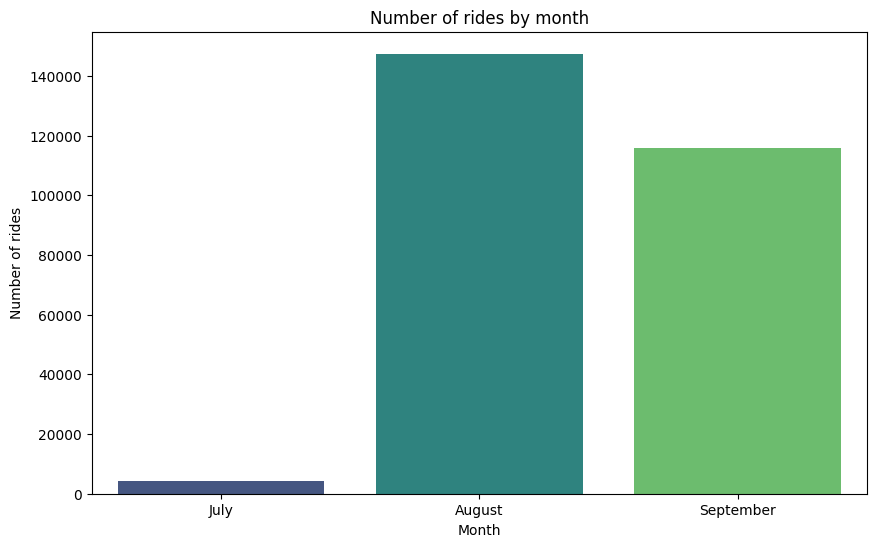

In [10]:
plot_rides_by_month(data, ['July', 'August', 'September'])


The smallest amount of data is present for July, and the largest for August. However, one should not draw conclusions that there were drastically fewer rides in July, since probably not enough data was collected for that month.

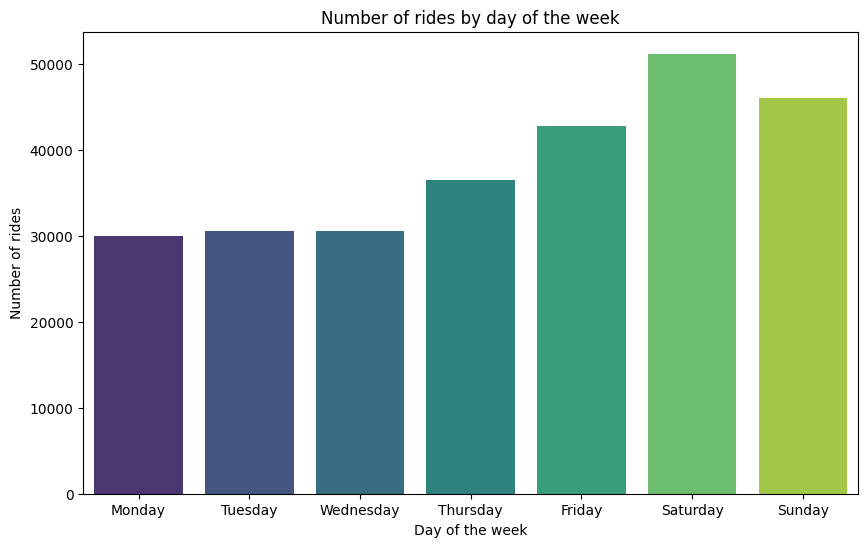

In [11]:
plot_rides_by_day(data)

The chart indicates a significant increase in Lyft pickups during the weekend, with Saturday and Sunday showing the highest numbers. This suggests that people are more likely to use ride-sharing services during the weekend, possibly due to social events, leisure activities, or nightlife, where public transportation options may be less convenient or available.

From Monday to Wednesday, the number of trips remains relatively consistent, with a gradual increase starting from Thursday. Friday shows a notable increase in pickups compared to the earlier weekdays. This might be indicative of a transition period where people begin to engage in weekend activities or travel to different locations after the workweek ends.

For Lyft, understanding these patterns is crucial for resource allocation. It may be beneficial to deploy more drivers and resources during weekends and Thursday/Friday evenings to meet the increased demand. Conversely, maintaining an optimal yet efficient service during lower demand periods like Monday to Wednesday could help manage costs.

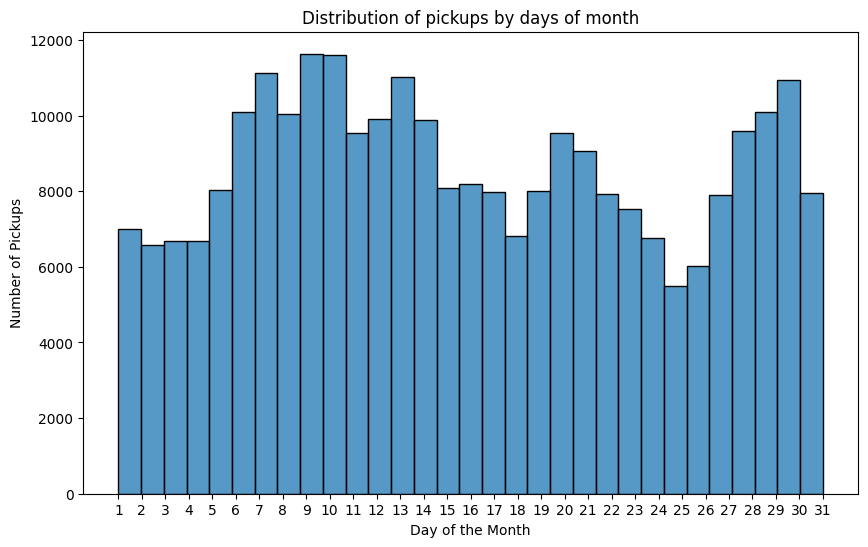

In [12]:
plot_rides_by_day_of_month(data)

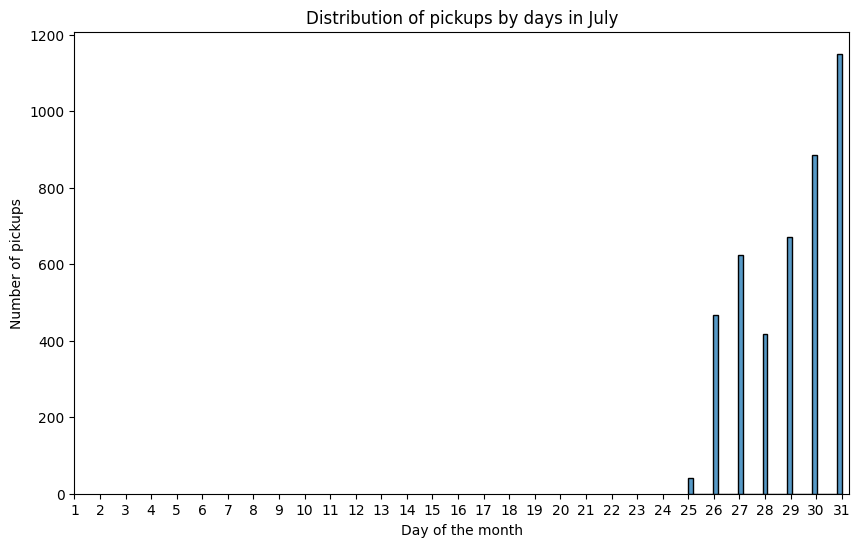

In [21]:
plot_rides_by_day_for_specific_month(data, 'July')

Since there is hardly any data for July, it does not make sense to analyze individual data for that month.

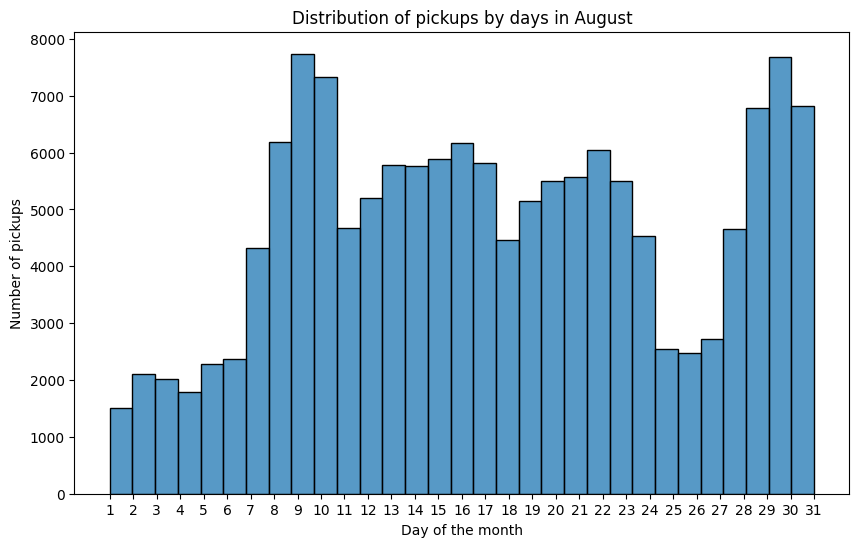

In [19]:
plot_rides_by_day_for_specific_month(data, 'August')

The highest peaks occur on the 9th, 10th, and 31st of August, with the number of pickups approaching or exceeding 7,000.  
There are also significant peaks on the 29th and 30th, indicating a sharp increase in demand towards the end of the month.  
A noticeable dip in pickups occurs around the 25th to 27th, with the lowest point on the 26th. This could suggest a period of reduced activity, possibly due to fewer events.  
The histogram also shows a relatively steady flow of pickups between the 13th and 22nd, with moderate peaks. This could be indicative of regular weekday activity with no significant outliers.

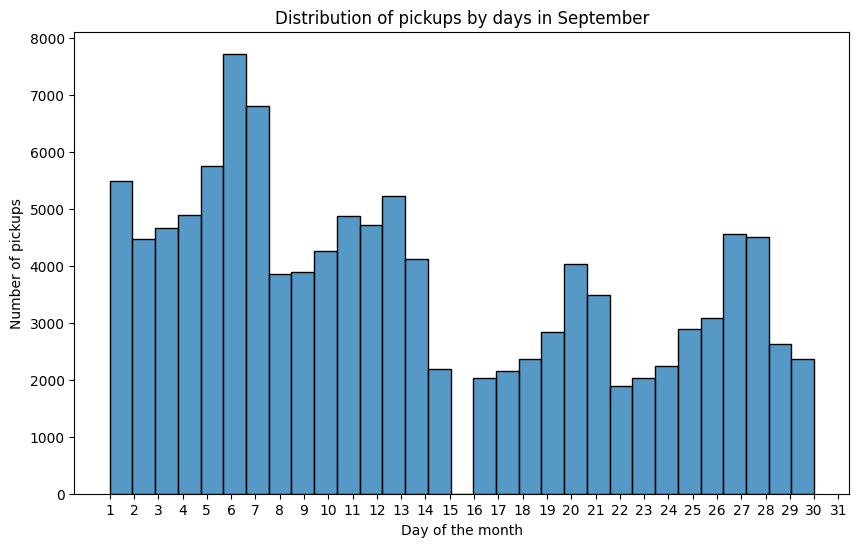

In [20]:
plot_rides_by_day_for_specific_month(data, 'September')

The highest peaks occur on the 6th, followed by the 7th. These dates likely coincide with significant events or increased weekend activities, similar to what was observed in August.  
The US Open was ongoing during this period, with matches continuing until September 8th. This event draws thousands of attendees, including international visitors, contributing to a spike in ride-sharing usage.  
Also, the start of Fashion Week on September 6th likely contributed to the increased transportation demand as attendees moved between shows and parties.  

The weekends (e.g., 5th-7th, 12th-14th, and 26th-28th) generally show higher pickup volumes, which aligns with the trend of increased social and recreational activities during weekends.

The absence of data for September 16 is likely due to data collection errors, as this was not a significant date in New York. Therefore, we will ignore this.

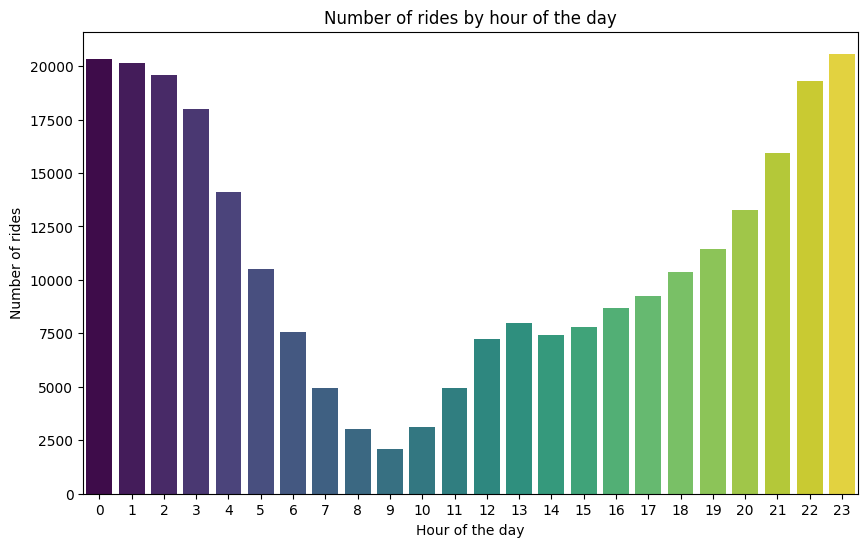

In [13]:
plot_rides_by_hour(data)

The data shows a significant number of trips during the late-night hours, particularly around midnight (00:00) and continuing into the early morning hours (01:00 - 03:00). This peak can be attributed to late-night activities such as people returning home from social events, nightlife, or after-hours work shifts. This suggests a strong demand for Lyft services during these times, likely due to the limited availability of public transportation.
There is a notable rise in Lyft pickups starting from 18:00, reaching a peak at 23:00. This evening increase is likely driven by a combination of factors: people heading home from work, going out for dinner, attending evening events, etc. The highest numbers are observed around 23:00, possibly reflecting the time when people are wrapping up their evening activities and heading home.

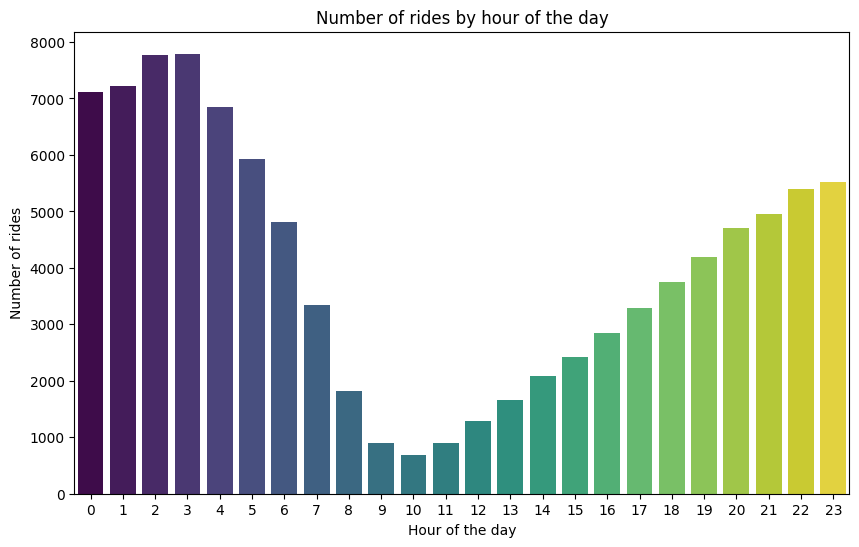

In [14]:
weekend_data = data[data['DayOfWeek'].isin(['Saturday', 'Sunday'])]

plot_rides_by_hour(weekend_data)

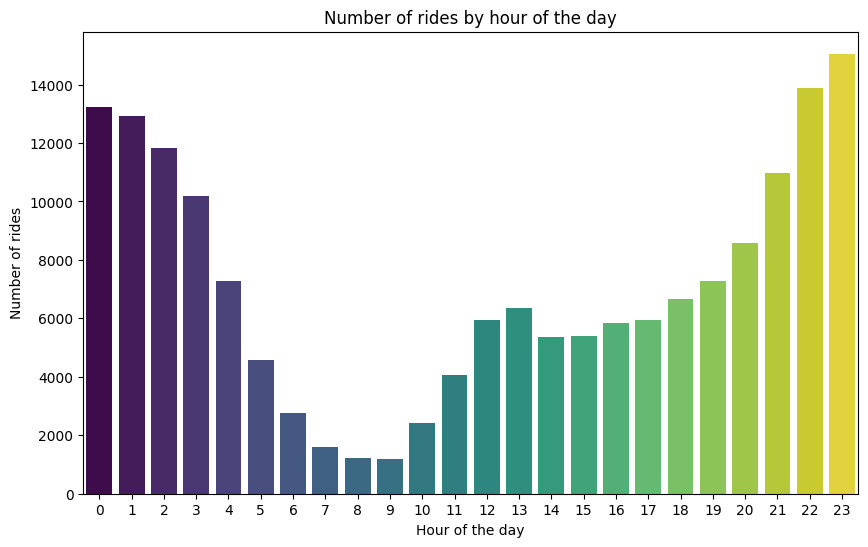

In [15]:
weekday_data = data[data['DayOfWeek'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]

plot_rides_by_hour(weekday_data)

Let's look at how ride numbers change by hour during weekends compared to weekdays. The overall pattern is similar, but on weekends, there are more rides from midnight to early morning, while on weekdays, most rides happen in the late evening, which is expected.

In [16]:
Longitudes = data['start_lng'].values
Latitudes  = data['start_lat'].values

top, bottom, left, right = 41, 40.55, -74.3, -73.6

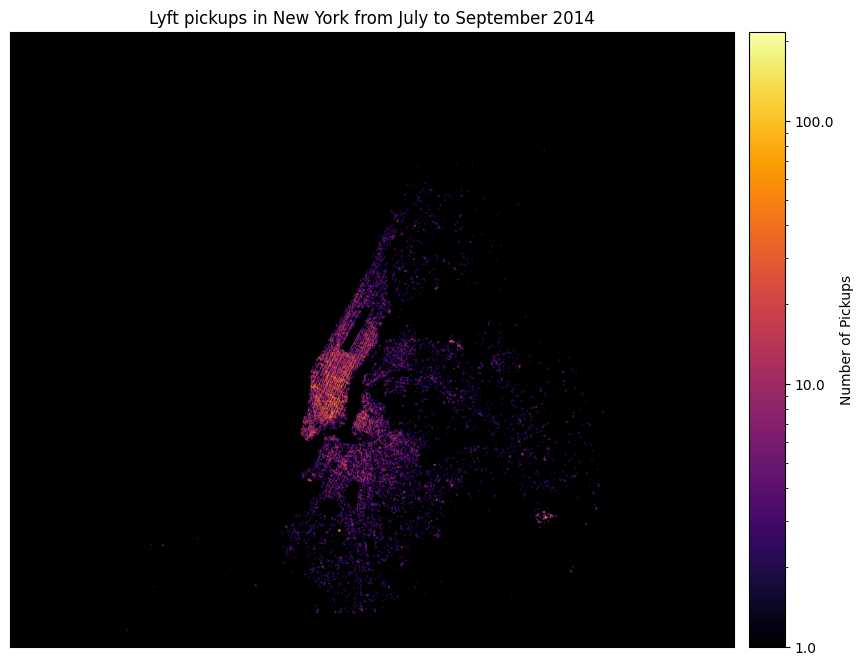

In [17]:
plt.figure(figsize=(10, 10))
plt.title('Lyft pickups in New York from July to September 2014')

ax = plt.gca()
ax.set_facecolor('black')

map = Basemap(projection='merc', urcrnrlat=top, llcrnrlat=bottom, llcrnrlon=left, urcrnrlon=right)
x, y = map(Longitudes, Latitudes)
map.hexbin(x, y, gridsize=1000, bins='log', cmap=cm.inferno)
map.colorbar(location='right', format='%.1f', label='Number of Pickups')
plt.show()

The brightest and most concentrated area in the image, corresponding to the central part of Manhattan, is likely where the most Lyft pickups occur. The area south of Midtown, particularly around the Financial District and the area near the World Trade Center, also shows significant activity, though less dense than Midtown.

 To the south of Manhattan, there are noticeable clusters of activity in Brooklyn, particularly in areas close to Manhattan like Williamsburg, Brooklyn Heights, and Downtown Brooklyn. Areas in western Queens, likely around Long Island City and Astoria, also show some level of activity, though less intense than in Manhattan.

 Conclusion: Manhattan (particularly Midtown and Lower Manhattan) has the highest concentration of Lyft pickups. Brooklyn and Queens show notable activity but are less dense compared to Manhattan.